# ANALISIS POLUTAN PADA DATASET AIR QUALITY UAS PEMROGRAMAN DASAR SAINS DATA
# DATA KELAS IF-1
- Kelompok : 3
- Anggota : </br>
10123009 - Baihaqi Syawkat</br>
10123010 - Reyhan Tahira </br>
10123013 - Dhaffa Khairu M.R.T</br>
10123019 - Cheryl Jessica Oktavia</br>
10123025 - M Faiq Nurfathurraji</br>
10123040 - Rikza Danan Irdian

## Pertanyaan
Pertanyaan 1 : Mana sajakah kota yang termasuk ke dalam top 5 rata-rata jumlah polutan paling banyak dan paling sedikit di tahun 2014? 10123009 - Baihaqi Syawkat <br>
Pertanyaan 2 : Bagaimana hasil analisis kenaikan polutan pertahun di kota yang memiliki rata-rata jumlah polutan tertinggi dan terendah? 10123010 - Reyhan Tahira <br>
Pertanyaan 3 : Bagaimana hasil perbandingan kualitas udara di kota Tiantan dan Wanliu pada tahun 2014 berdasarkan rata-rata jumlah konsentrasi partikulat (PM10)? 10123013 - Dhaffa Khairu M.R.T <br>
Pertanyaan 4 : Bagaimana kualitas udara di kota Huairou pada tahun 2016 berdasarkan rata-rata jumlah konsentrasi partikulat (PM2.5) per bulannya? 10123019 - Cheryl Jessica Oktavia <br>
Pertanyaan 5 : Bagaimana hasil prediksi kualitas udara di kota Shunyi berdasarkan rata-rata jumlah konsentrasi partikulat (PM2.5)? 10123025 - M Faiq Nurfathurraji <br>
Pertanyaan 6 : Bagaimana hasil perbandingan curah hujan terhadap tingkat polutan pada kota yang memiliki polutan tertinggi dan terendah di tahun 2017? 10123040 - Rikza Danan Irdian <br>

In [11]:
#import requirements
!pip install streamlit
!pip install streamlit-option-menu
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import calendar
from streamlit_option_menu import option_menu
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 21.5 MB/s eta 0:00:00


2025-02-13 04:16:14.898 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [12]:
@st.cache_data
#Load Data CSV
def load_data(url) :
    df = pd.read_csv(url)
    return df

2025-02-13 04:16:51.599 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


### Memanggil Dataset CSV dari Github

In [13]:
df_Aotizhongxin = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Changping = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv')
df_Dingling = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv')
df_Dongsi = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv')
df_Guanyuan = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv')
df_Gucheng = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv')
df_Huairou = load_data ('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv')
df_Nongzhanguan = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_Shunyi = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv')
df_Tiantan = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv')
df_Wanliu = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv')
df_Wanshouxigong = load_data('https://raw.githubusercontent.com/reyhantahira/AirQuality/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

2025-02-13 04:16:56.073 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-02-13 04:16:56.081 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:16:56.330 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-13 04:16:56.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:16:56.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:16:56.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:16:56.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:16:56.828 Thread 'MainThread': miss

### Pertanyaan 1 10123009 - Baihaqi Syawkat

In [16]:
#Pengerjaan Baihaqi Syawkat
def Top5_Polutan_2014(df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi, df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan, df_Shunyi, df_Tiantan, df_Wanliu, df_Wanshouxigong):
    # Menggabungkan semua DataFrame dalam dictionary
    dfs = {
        'Aotizhongxin': df_Aotizhongxin,
        'Changping': df_Changping,
        'Dingling': df_Dingling,
        'Dongsi': df_Dongsi,
        'Guanyuan': df_Guanyuan,
        'Gucheng': df_Gucheng,
        'Huairou': df_Huairou,
        'Nongzhanguan': df_Nongzhanguan,
        'Shunyi': df_Shunyi,
        'Tiantan': df_Tiantan,
        'Wanliu': df_Wanliu,
        'Wanshouxigong': df_Wanshouxigong
    }

    # Menambahkan kolom Total_Pollutants ke setiap DataFrame
    for name, df in dfs.items():
        if all(col in df.columns for col in ['SO2', 'NO2', 'CO', 'O3', 'year']):
            df['Total_Pollutants'] = df[['SO2', 'NO2', 'CO', 'O3']].sum(axis=1)

    # Menghitung rata-rata polutan per kota pada tahun 2014
    total_polutan_2014 = {}
    for name, df in dfs.items():
        if 2014 in df['year'].values:
            total_polutan_2014[name] = df.groupby('year')['Total_Pollutants'].mean().loc[2014]

    # Membuat DataFrame dari hasil perhitungan
    df_polutan = pd.DataFrame(list(total_polutan_2014.items()), columns=['Kota', 'Total_Polutan'])
    df_sorted = df_polutan.sort_values(by='Total_Polutan', ascending=False)
    colors = ['red', 'yellow', 'green']
    labels = ['Top 5 Polutan Tertinggi', 'Top Polutan Menengah', 'Top 5 Polutan Terendah']

    # Grafik utama - Semua kota
    fig, ax = plt.subplots()
    ax.bar(df_polutan['Kota'], df_polutan['Total_Polutan'], color=['green', 'green', 'green', 'red', 'red', 'red', 'green', 'red', 'green', 'yellow', 'yellow', 'red'])
    ax.set_xlabel("Kota")
    ax.set_ylabel("Rata-Rata Polutan")
    ax.set_xticklabels(df_polutan['Kota'], rotation=85)
    st.title("Grafik Polutan Kota Tahun 2014")
    for color, label in zip(colors, labels):
        ax.plot([], [], color=color, label=label, linewidth=8)
    ax.legend(loc='upper right', bbox_to_anchor=(1.25,1.15), ncol=len(labels), frameon=False)
    st.pyplot(fig)

#Hasil dari analisis
    with st.expander("Hasil Analisis Dengan Menampilkan Semua Kota Dengan Top 5 Polutan Tertinggi Dan Top 5 Polutan Terendah Berdasarkan Grafik Polutan Kota Tahun 2014") :
        st.write( '''
    Disini saya menampilkan semua kota pada grafik dengan Tingkat polusi udara di 12 kota berdasarkan data tahun 2014. Hasil analisis ditampilkan dalam grafik batang, dengan kategori warna sebagai indikator tingkat polusi:

    Merah : 5 kota dengan tingkat polusi tertinggi.

    Kuning : Kota dengan tingkat polusi menengah.

    Hijau : 5 kota dengan tingkat polusi terendah.
    ''')

    with st.expander("Kesimpulan") :
        st.write('''
        Hasil dari Analisis tersebut menunjukkan bahwa tingkat polusi udara di 12 kota pada tahun 2014 bervariasi signifikan, dengan beberapa kota memiliki tingkat polutan yang jauh lebih tinggi. Lima kota dengan polusi tertinggi memerlukan perhatian lebih karena berisiko terhadap kesehatan masyarakat, terutama penyakit pernapasan.

        Kota dengan polusi rendah dapat dijadikan contoh dalam penerapan kebijakan lingkungan untuk mengurangi emisi. Pemantauan kualitas udara yang berkelanjutan dan kebijakan yang tepat sangat diperlukan untuk mengendalikan polusi dan meningkatkan kualitas hidup masyarakat.
        ''')

    st.write('<hr>',unsafe_allow_html = True)

    # Grafik 5 tertinggi dan 5 terendah
    top5 = df_sorted.head(5)
    bottom5 = df_sorted.tail(5)
    fig_top , ax_top = plt.subplots()

    ax_top.bar(top5['Kota'], top5['Total_Polutan'], color='red')
    ax_top.set_title("5 Kota dengan Polutan Tertinggi")
    ax_top.set_xlabel("Kota")
    ax_top.set_ylabel("Rata-Rata Polutan")
    ax_top.tick_params(axis='x', rotation=35)

    st.pyplot(fig_top)
    with st.expander("Hasil Analisis Top 5 Polutan Tertinggi") :
        st.write(''' Menampilkan Grafik batang (bar chart) dari 5 kota dengan tingkat polusi tertinggi berdasarkan data yang telah diurutkan sebelumnya.
        Menampilkan grafik batang dengan kota sebagai sumbu-x dan total polutan sebagai sumbu-y.
        Semua batang berwarna merah, menandakan kota-kota dengan polusi tertinggi.''')

        st.write('''Daftar Top 5 Kota dengan Polutan Tertinggi :

         1. Guanyuan    2. Dongsi   3. Gucheng  4. Wanshouxigong    5. Tiantan
        ''')

    with st.expander("Kesimpulan") :
        st.write('''Kota-kota ini memiliki tingkat polutan yang jauh lebih tinggi dibandingkan kota lainnya, yang dapat berdampak buruk bagi kesehatan dan lingkungan.
         Kota dengan polusi tinggi memerlukan tindakan segera, seperti pengurangan emisi industri dan kendaraan.
         Visualisasi ini membantu memahami pola distribusi polusi, sehingga bisa menjadi dasar bagi kebijakan pengendalian polusi udara di masa depan.
         ''')

    st.write('<hr>',unsafe_allow_html = True)

    fig_bottom, ax_bottom = plt.subplots()

    ax_bottom.bar(bottom5['Kota'], bottom5['Total_Polutan'], color='green')
    ax_bottom.set_title("5 Kota dengan Polutan Terendah")
    ax_bottom.set_xlabel("Kota")
    ax_bottom.set_ylabel("Rata-Rata Polutan")
    ax_bottom.tick_params(axis='x', rotation=35)

    st.pyplot(fig_bottom)
    with st.expander("Hasil Analisis Top 5 Polutan Terendah") :
        st.write('''
        Menampilkan Grafik batang (bar chart) dari 5 kota dengan tingkat polusi terendah berdasarkan data yang telah diurutkan sebelumnya.
        Menampilkan grafik batang dengan kota sebagai sumbu-x dan total polutan sebagai sumbu-y.
        Semua batang diberi warna hijau, yang menandakan kota-kota dengan polusi terendah.''')

        st.write('''Daftar Top 5 Kota dengan Polutan Terendah:

        1. Huairou  2. Shunyi   3. Changping    4. Nongzhanguan 5. Wanliu
        ''')
    with st.expander("Kesimpulan") :
        st.write('''
        Kota-kota ini memiliki kualitas udara yang lebih baik dibandingkan kota lainnya, yang dapat memberikan manfaat bagi kesehatan masyarakat dan lingkungan.
        Kota dengan polusi terendah dapat menjadi contoh dalam penerapan kebijakan ramah lingkungan untuk kota lain.
        Hasil visualisasi ini menunjukkan bahwa ada daerah dengan tingkat polusi rendah, yang bisa dipelajari lebih lanjut untuk mencari faktor-faktor yang mendukung kualitas udara yang lebih baik.
        Pemantauan polusi secara rutin tetap diperlukan, agar kualitas udara tetap terjaga dan tidak meningkat seiring waktu.
        ''')

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10123009 - Baihaqi Syawkat")

### Pertanyaan 2 10123010 - Reyhan Tahira

In [17]:
#Pengerjaan Reyhan Tahira
def Kenaikan_Polutan_TinggiRendah_2014 (df_Gucheng, df_Dingling) :
    #Kota dengan polutan tertinggi tahun 2014
    #Cleaning data dengan menghapus nilai null
    df_Gucheng.dropna(subset=['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP', 'PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)
    df_Gucheng.reset_index(drop=True, inplace=True)

    #Menambahkan kolom polutan di kota Gucheng
    df_Gucheng['Total_Pollutants'] = df_Gucheng[['SO2', 'NO2', 'CO', 'O3']].sum(axis=1)

    #Rata-rata Polutan per tahun di kota Gucheng
    rata2_polutan_Gucheng= df_Gucheng.groupby('year')['Total_Pollutants'].mean()

    #Pembuatan grafik pertahun pada kota dengan polutan tertinggi tahun 2014
    tahun_list= rata2_polutan_Gucheng.index.tolist()
    rata2_polutan1 = rata2_polutan_Gucheng.values.tolist()
    print(tahun_list)
    print(rata2_polutan1)

    fig,ax = plt.subplots()
    ax.bar(
        tahun_list,
        rata2_polutan1,
        color = 'blue'
    )
    ax.set_xlabel('Tahun')
    ax.set_ylabel('Total Polutan')
    st.title('Rata-Rata Polutan Pertahun Di Kota Dengan Polutan Tertinggi pada tahun 2014 (Gucheng)')
    st.pyplot(fig)
    #Hasil analisis
    with st.expander(" Analisis kenaikan polutan pertahun di kota dengan polutan tertinggi pada tahun 2014") :
        st.write(''' #### Kota Gucheng''')
        st.write('''• **2013 - 2014** : Terjadi kenaikan polutan dari sekitar 1400 ke 1600.
                 • **2014 - 2015** : Sedikit menurun, namun masih relatif tinggi dibandingkan 2013.
                 • **2015 - 2016** : Turun signifikan hingga sekitar 1300, menunjukkan kemungkinan adanya perbaikan lingkungan atau pengurangan emisi.
                 • **2016 - 2017** : Lonjakan drastis hingga hampir 1900, yang kemungkinan besar disebabkan oleh peningkatan aktivitas industri, jumlah kendaraan, atau faktor lingkungan lainnya.''')

        st.write(''' **Kesimpulan :**
                 • Mengalami fluktuasi dengan tren menurun hingga 2016, tetapi terjadi lonjakan besar pada 2017.
                 • Tahun 2017 perlu perhatian khusus, karena peningkatan polusi sangat signifikan.''')

        st.write('<hr>', unsafe_allow_html=True)


    #Kota dengan polutan terendah tahun 2014
    #Cleaning data dengan menghapus nilai null
    df_Dingling.dropna(subset=['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP', 'PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)
    df_Dingling.reset_index(drop=True, inplace=True)

    #Menambahkan kolom polutan di kota Gucheng
    df_Dingling['Total_Pollutants'] = df_Dingling[['SO2', 'NO2', 'CO', 'O3']].sum(axis=1)

    #Rata-rata Polutan per tahun di kota Gucheng
    rata2_polutan_Dingling= df_Dingling.groupby('year')['Total_Pollutants'].mean()

    #Pembuatan grafik pertahun pada kota dengan polutan tertinggi tahun 2014
    tahun_list = rata2_polutan_Dingling.index.tolist()
    rata2_polutan2 = rata2_polutan_Dingling.values.tolist()
    print(tahun_list)
    print(rata2_polutan2)

    fig,ax = plt.subplots()
    ax.bar(
        tahun_list,
        rata2_polutan2,
        color = 'pink'
    )
    ax.set_xlabel('Tahun')
    ax.set_ylabel('Total Polutan')
    st.title('Rata-Rata Polutan Pertahun Di Kota Dengan Polutan Terendah Pada Tahun 2014 (Dingling)')
    st.pyplot(fig)

    #Hasil analisis
    with st.expander(" Analisis kenaikan polutan pertahun di kota dengan polutan terendah pada tahun 2014") :
        st.write(''' #### Kota Dingling''')
        st.write('''• **2013 - 2014** : Polutan stabil di sekitar 1000, menunjukkan kondisi udara yang relatif lebih bersih dibanding Gucheng.
                 • **2014 - 2015** : Sedikit meningkat ke sekitar 1100, tetapi masih dalam batas aman.
                 • **2015 - 2016** : Mengalami sedikit penurunan, yang bisa menunjukkan adanya pengendalian polutan.
                 • **2016 - 2017** : Terjadi peningkatan signifikan hingga hampir 1300, meskipun masih lebih rendah dibandingkan Gucheng.''')

        st.write(''' **Kesimpulan :**
                 • Polutan relatif stabil dari 2013 hingga 2016, dengan fluktuasi kecil.
                 • Peningkatan signifikan terjadi pada 2017, meskipun tidak se drastis Gucheng. ''')
    st.write('<hr>', unsafe_allow_html=True)

    #Kesimpulan
    with st.expander(' Kesimpulan') :
        st.write('''• Gucheng memiliki tingkat polutan yang jauh lebih tinggi dibandingkan Dingling dalam periode yang sama.
                 • Kedua kota mengalami lonjakan polusi signifikan pada tahun 2017, menunjukkan adanya faktor eksternal besar yang mempengaruhi kualitas udara.
                 • Dingling lebih stabil dibandingkan Gucheng, tetapi tetap mengalami peningkatan polusi di tahun-tahun tertentu.
                 • Perlu dilakukan studi lebih lanjut mengenai penyebab lonjakan pada 2017, baik dari segi peningkatan aktivitas manusia, faktor cuaca, atau perubahan kebijakan lingkungan.''')

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10123010 - Reyhan Tahira")

### Pertanyaan 3 10123013 - Dhaffa Khairu M.R.T

In [20]:
#Pengerjaan Dhaffa Khairu M.R.T
def Perbandingan_PM10_Tiantan_Wanliu (df_Tiantan,df_Wanliu) :
    #Cleaning data dengan menghapus nilai null
    df_Tiantan.dropna(subset=['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP', 'PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)
    df_Wanliu.dropna(subset=['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP', 'PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)

    pm10_Tiantan = df_Tiantan.groupby('year')['PM10'].mean()
    pm10_Wanliu = df_Wanliu.groupby('year')['PM10'].mean()

    st.write('### Tiantan')
    st.dataframe(pm10_Tiantan)
    st.write('### Wanliu')
    st.dataframe(pm10_Wanliu)
    # visualisasi
    tahun = ('2013','2014','2015','2016','2017')

    Jumlah_PM10_Tiantan = [
        pm10_Tiantan[2013],
        pm10_Tiantan[2014],
        pm10_Tiantan[2015],
        pm10_Tiantan[2016],
        pm10_Tiantan[2017]
    ]

    Jumlah_PM10_Wanliu = [
        pm10_Wanliu[2013],
        pm10_Wanliu[2014],
        pm10_Wanliu[2015],
        pm10_Wanliu[2016],
        pm10_Wanliu[2017]
    ]

    plt.figure(figsize=(8,5))
    plt.plot(tahun, Jumlah_PM10_Tiantan, label='Tiantan', marker='o', color='blue')
    plt.plot(tahun, Jumlah_PM10_Wanliu, label='Wanliu', marker='s', color='red')

    plt.title('Perbandingan Rata-Rata PM10 di Tiantan dan Wanliu')
    plt.xlabel('Tahun')
    plt.ylabel('Rata-Rata PM10')
    plt.legend()

    st.pyplot(plt)

    #Hasil analisis
    st.write('<hr>', unsafe_allow_html=True)
    with st.expander("### Kesimpulan") :
        st.write("1. Tren Perubahan PM10")

        st.write("- Secara umum, terjadi fluktuasi nilai rata-rata PM10 di kedua lokasi, Tiantan dan Wanliu, dalam rentang tahun 2013 hingga 2017.")
        st.write("- Tiantan (garis biru) menunjukkan tren yang relatif stabil di awal, mengalami sedikit penurunan pada 2015 dan 2016, lalu meningkat signifikan pada 2017.")
        st.write("- Wanliu (garis merah) mengalami kenaikan tajam pada 2014, kemudian mengalami penurunan drastis hingga 2016, sebelum kembali meningkat pada 2017.")

        st.write("2. Perbedaan Pola di Tiantan dan Wanliu")

        st.write("- Wanliu memiliki lonjakan signifikan pada tahun 2014 dibandingkan Tiantan.")
        st.write("- Pada tahun 2015 dan 2016, rata-rata PM10 di Wanliu lebih rendah dibandingkan Tiantan, namun pada 2017 terjadi kenaikan kembali.")
        st.write("- Fluktuasi di Wanliu tampak lebih tajam dibandingkan Tiantan, menunjukkan bahwa faktor lingkungan atau kebijakan lokal mungkin lebih berdampak di lokasi tersebut.")

        st.write("3. Kesimpulan Umum")

        st.write("- Kedua lokasi mengalami variabilitas dalam tingkat polusi udara PM10 selama periode yang diamati.")
        st.write("- Tahun 2016 tampaknya menjadi tahun dengan nilai PM10 terendah di kedua lokasi.")
        st.write("- Tren kenaikan kembali di tahun 2017 mengindikasikan adanya potensi peningkatan polusi udara setelah sebelumnya mengalami penurunan.")

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10123013 - Dhaffa Khairu M.R.T")

### Pertanyaan 4 10123019 - Cheryl Jessica Oktavia

In [21]:
#Pengerjaan Cheryl Jessica Oktavia
def Kualitas_Udara_Huairou_2016 (df_Huairou):
    # Cleaning data dengan menghapus nilai null
    df_Huairou.dropna(subset=['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP', 'PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)

    df_Huairou.reset_index(drop=True, inplace=True)

    # Menambahkan kolom baru untuk total polutan
    df_Huairou['Total_PM2.5'] = df_Huairou[['PM2.5']].sum(axis=1)

    # Mengelompokkan data berdasarkan tahun dan menghitung rata-ra
    rata2_pm_Huairou = df_Huairou.groupby(['month','year'])['Total_PM2.5'].mean()

    st.title('Kualitas Udara Kota Huairou')
    st.header('Konsentrasi Partikulat (PM2.5)')
    st.write('''Kategori kualitas udara konsetrasi partikulat (PM2.5) dari mulai Sehat, Sedang, Tidak Sehat, Sangat Tidak Sehat,
             dan Berbahaya menurut BMKG : \n1. Kategori 'Sehat' ada di kisaran 0 - 15.5 \u03BCg/m\u00B3. \n2. Kategori 'Sedang' ada di
             kisaran 15.6 - 55.4 \u03BCg/m\u00B3. \n3. Kategori 'Tidak Sehat' ada di kisaran 55.5 - 150.4 \u03BCg/m\u00B3. \n4. Kategori
             'Sangat Tidak Sehat' ada di kisaran 150.5 - 250.4 \u03BCg/m\u00B3. \n5. Kategori 'Berbahaya' > 250.5 \u03BCg/m\u00B3.''')

    total_pm_2016 = [
    rata2_pm_Huairou.loc[1,2016],
    rata2_pm_Huairou.loc[2,2016],
    rata2_pm_Huairou.loc[3,2016],
    rata2_pm_Huairou.loc[4,2016],
    rata2_pm_Huairou.loc[5,2016],
    rata2_pm_Huairou.loc[6,2016],
    rata2_pm_Huairou.loc[7,2016],
    rata2_pm_Huairou.loc[8,2016],
    rata2_pm_Huairou.loc[9,2016],
    rata2_pm_Huairou.loc[10,2016],
    rata2_pm_Huairou.loc[11,2016],
    rata2_pm_Huairou.loc[12,2016]
    ]
    bulan = ['Januari','Febuari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

    # List warna untuk mengkategorikan kualitas udara konsentrasi partikulat PM2.5
    color_list = []
    for i in range (len(total_pm_2016)) :
        if total_pm_2016[i] > 250.5 :
            color_pm = 'grey'
        elif  150.5 <= total_pm_2016[i] <= 250.4 :
            color_pm = 'red'
        elif 55.5 <= total_pm_2016[i] <= 150.4 :
            color_pm = 'yellow'
        elif 15.6 <= total_pm_2016[i] <= 55.4 :
            color_pm = 'blue'
        elif total_pm_2016[i] <= 15.5 :
            color_pm = 'green'

        color_list.append(color_pm)

    st.write('''Akan dilakukan analisis terhadap kualitas udara di kota Huairou pada tahun 2016 dengan menghitung rata-rata jumlah konsentrasi partikulat (PM2.5)
             per bulannya.''')

    # Visualisasi diagram batang rata-rata PM2.5 per bulan kota Huairou
    colors = ['green', 'blue', 'yellow', 'red', 'grey']
    labels = ['Sehat', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
    st.header('Grafik Konsentrasi Partikulat (PM2.5) Kota Huairou Tahun 2016')
    fig, ax = plt.subplots(figsize=(8, 0))
    for color, label in zip(colors, labels):
        ax.plot([], [], color=color, label=label, linewidth=8)
    ax.legend(title='', loc='center', ncol=len(labels), frameon=False)
    ax.axis('off')
    st.pyplot(fig)
    fig,ax = plt.subplots()
    ax.bar(
        bulan,
        total_pm_2016,
        color = color_list
    )
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Rata-rata PM2.5 (\u03BCg/m\u00B3)')
    ax.set_title('PM2.5 Per Bulan Kota Huairou Tahun 2016')
    plt.xticks(rotation=75)
    st.pyplot(fig)

    with st.expander('Penjelasan Grafik Konsentrasi Partikulat (PM2.5) Kota Huairou Tahun 2016') :
        st.write('''Dapat dilihat dari diagram batang di atas bahwa total PM2.5 di kota Huairou di bulan Febuari, Mei, Juni, Agustus, September
                termasuk ke dalam kualitas udara kategori 'Sedang'. Lalu, di bulan Januari, Maret, April, Juli, Oktober, Desember termasuk ke dalam kualitas udara
                kategori 'Tidak Sehat'. Hasil tersebut diambil dari data konsentrasi partikulat PM2.5 yang ada di kota Huairou pada tahun 2016.''')
    st.write('''Berikut adalah tabel detail rata-rata jumlah PM2.5 per bulan di kota Huairou pada tahun 2016.''')

    # Filter data untuk tahun 2016 dan hitung jumlah rata-rata per bulan
    total_per_bulan = df_Huairou[df_Huairou['year'] == 2016].groupby('month')['Total_PM2.5'].mean()

    # Ubah indeks angka bulan menjadi nama bulan
    total_per_bulan.index = total_per_bulan.index.map(lambda x: calendar.month_name[x])

    # Buat DataFrame horizontal (baris sebagai Rata-rata PM2.5, kolom sebagai bulan)
    total_df = pd.DataFrame(total_per_bulan).T

    # Tambahkan kolom untuk total keseluruhan
    total_df['Total Keseluruhan'] = total_df.sum(axis=1)

    # Tampil data
    st.dataframe(total_df)

    st.write('<hr>', unsafe_allow_html=True)
    st.write('''Mari kita lihat perbandingan antara bulan yang memiliki konsentrasi partikulat (PM2.5) tertinggi dan terendah.''')

    # Menentukan bulan dengan PM2.5 tertinggi dan terendah
    max_index = total_pm_2016.index(max(total_pm_2016).mean())
    min_index = total_pm_2016.index(min(total_pm_2016).mean())

    bulan_terpilih = [bulan[min_index], bulan[max_index]]
    pm_terpilih = [total_pm_2016[min_index], total_pm_2016[max_index]]
    warna_terpilih = [color_list[min_index], color_list[max_index]]

    # Visualisasi diagram batang hanya untuk PM2.5 tertinggi dan terendah
    st.header('Grafik Konsentrasi Partikulat (PM2.5) Tertinggi dan Terendah di Kota Huairou Tahun 2016')
    fig, ax = plt.subplots(figsize=(8, 7))
    bars = ax.bar(bulan_terpilih, pm_terpilih, color=warna_terpilih)

    # Menambahkan label nilai di atas setiap batang
    for bar, value in zip(bars, pm_terpilih):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            f'{value:.1f}',
            ha='center', va='bottom', fontsize=12, color='black'
        )
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Rata-rata PM2.5 (\u03BCg/m\u00B3)')
    ax.set_title('PM2.5 Tertinggi dan Terendah Tahun 2016')
    st.pyplot(fig)

    with st.expander('Penjelasan Grafik Konsentrasi Partikulat (PM2.5) Tertinggi dan Terendah Kota Huairou Tahun 2016') :
        st.write('''Diagram di atas menampilkan perbandingan rata-rata jumlah PM2.5 tertinggi yakni di bulan Desember dengan total 93.2 \u03BCg/m\u00B3
                 dan terendah di bulan Febuari dengan total 38.9 \u03BCg/m\u00B3.''')

    st.write('<hr>', unsafe_allow_html=True)
    st.header('Kesimpulan')
    st.write('''Dari hasil analisis di atas, dapat disimpulkan bahwa kualitas udara yang didapat dari jumlah rata-rata konsentrasi partikulat (PM2.5)
             per bulan di kota Huairou pada tahun 2016 didominasi oleh kategori 'Sedang' dan 'Tidak Sehat'. Bulan Desember memiliki rata-rata PM2.5 tertinggi
             sebesar 93.2 µg/m³, sedangkan bulan Februari memiliki rata-rata terendah sebesar 38.9 µg/m³.''')
    st.write('''Analisis ini berguna dalam memantau risiko kesehatan akibat paparan polusi udara, terutama di bulan-bulan dengan
             kualitas udara buruk. Selain itu, hasil analisis dapat menjadi dasar bagi pemerintah lokal untuk mengambil kebijakan yang tepat dalam mengurangi polusi udara.
             Masyarakat juga dapat menggunakan informasi ini untuk merencanakan aktivitas luar ruangan dengan lebih bijak berdasarkan pola kualitas udara bulanan yang telah teridentifikasi.''')

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10123019 - Cheryl Jessica Oktavia")

### Pertanyaan 5 10123025 - M Faiq Nurfathurraji

In [22]:
#Pengerjaan M.Faiq Nurfathurraji
def Prediksi_PM_Kota_Shunyi (df_Shunyi) :

    df_Shunyi.dropna(subset=['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP', 'PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)
    # Load data
    def load_data():
        df_Shunyi["date"] = pd.to_datetime(df_Shunyi[["year", "month", "day", "hour"]])
        df_Shunyi.set_index("date", inplace=True)
        return df_Shunyi

    df_Shunyi = load_data()

    def find_best_arima_order(series):
        p = d = q = range(0, 3)
        pdq = list(itertools.product(p, d, q))
        best_aic, best_bic, best_order = float("inf"), float("inf"), None

        for param in pdq:
            try:
                model = ARIMA(series, order=param).fit()
                if model.aic < best_aic or model.bic < best_bic:
                    best_aic, best_bic, best_order = model.aic, model.bic, param
            except:
                continue

        return best_order

    def train_arima_model(series):
        best_order = find_best_arima_order(series)
        model = ARIMA(series, order=best_order).fit()
        return model, best_order

    st.title("Prediksi Kualitas Udara (PM2.5) dengan ARIMA")

    if st.button("Train Model ARIMA"):
        with st.spinner("Training model... ini akan memakan waktu beberapa menit..."):
            series = df_Shunyi["PM2.5"].fillna(method="ffill")
            model, best_order = train_arima_model(series)
            st.success(f"Model ARIMA terbaik dengan order {best_order} berhasil dilatih!")

        # Prediksi
        forecast = model.forecast(steps=100)

        # Visualisasi hasil prediksi
        fig, ax = plt.subplots(figsize=(12, 5))
        ax.plot(series[-500:], label="Actual Data", color="green")
        ax.plot(series.index[-1] + pd.to_timedelta(np.arange(1, 101), unit='h'), forecast, label="Predicted Data", color="red", linestyle="dashed")
        ax.set_xlabel("Waktu")
        ax.set_ylabel("PM2.5")
        ax.set_title("Prediksi PM2.5 menggunakan ARIMA")
        ax.legend()

        st.pyplot(fig)

        st.write("## <center> KESIMPULAN </center>", unsafe_allow_html=True )
        st.write('<hr>', unsafe_allow_html=True)
        st.write("Dari kedua grafik yang ditampilkan dalam Dashboard Analisis Air Quality kita dapat menarik beberapa kesimpulan terkait hubungan antara curah hujan dan tingkat polutan di Wanshouxigong (kota dengan polutan tertinggi) dan Dingling (kota dengan polutan terendah) pada tahun 2017:")

        st.write("<b> 1. Polusi Udara Berfluktuasi </b>", unsafe_allow_html=True)

        st.write("- Grafik menunjukkan bahwa kadar PM2.5 mengalami fluktuasi yang cukup signifikan dari hari ke hari.")
        st.write("- Ada beberapa periode di mana tingkat polusi meningkat tajam, kemungkinan akibat faktor lingkungan seperti cuaca, aktivitas industri, atau lalu lintas.")

        st.write("<b> 2. Lonjakan dan Penurunan PM2.5 </b>", unsafe_allow_html=True)

        st.write("- Terlihat bahwa pada pertengahan Februari 2017, terjadi lonjakan tinggi PM2.5, yang menandakan adanya peningkatan signifikan dalam pencemaran udara.")
        st.write("- Setelah lonjakan tersebut, kadar PM2.5 mengalami penurunan sebelum kembali meningkat di awal Maret 2017.")

        st.write("<b> 3. Kualitas Udara Tidak Stabil </b>", unsafe_allow_html=True)

        st.write("- Kualitas udara dalam periode ini tidak menunjukkan kestabilan, dengan adanya lonjakan dan penurunan tajam dalam waktu yang relatif singkat.")
        st.write("- Hal ini menunjukkan bahwa ada faktor dinamis yang mempengaruhi tingkat polusi, seperti perubahan musim, hujan, atau peningkatan aktivitas manusia.")

        st.write("<b> 4. Prediksi Menunjukkan Potensi Peningkatan </b>", unsafe_allow_html=True)

        st.write("- Berdasarkan pola yang terlihat, kadar PM2.5 diprediksi mengalami peningkatan di awal Maret 2017.")
        st.write("- Jika tren ini terus berlanjut, maka wilayah tersebut mungkin menghadapi kualitas udara yang lebih buruk dalam beberapa hari mendatang.")

        st.write("### Kesimpulan Akhir", unsafe_allow_html=True)
        st.write("- Data ini menunjukkan bahwa polusi udara (PM2.5) di wilayah tersebut cukup dinamis dan mengalami perubahan yang cukup drastis dalam waktu singkat.")
        st.write("- Polusi udara cenderung meningkat dalam periode tertentu, sehingga penting untuk memahami faktor-faktor yang memengaruhi perubahan ini, seperti musim, curah hujan, dan aktivitas manusia.ng.")
        st.write("- Untuk mengurangi dampak polusi, diperlukan upaya mitigasi seperti pengendalian emisi kendaraan, peningkatan ruang hijau, atau kebijakan lingkungan yang lebih ketat.")

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10123025 - M Faiq Nurfathurraji")

### Pertanyaan 6 Pengerjaan 10123040 - Rikza Danan Irdian

In [23]:
#Pengerjaan Rikza Danan Irdian
def Perbandingan_Hujan_Polutan_2017 (df_Wanshouxigong,df_Dingling) :
    #Cleaning data dengan menghapus nilai null
    df_Wanshouxigong.dropna(subset=['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP', 'PRES','DEWP','RAIN','wd','WSPM','station'], axis=0, inplace=True)

    #Menambahkan Kolom Baru untuk Total Hujan dan Polutan DI Kota Wanshouxigong dan Dingling
    df_Wanshouxigong['Total_Hujan'] = df_Wanshouxigong[['RAIN']].sum(axis=1)
    df_Dingling['Total_Hujan'] = df_Dingling[['RAIN']].sum(axis=1)
    df_Wanshouxigong['Total_Polutan'] = df_Wanshouxigong[['SO2', 'NO2', 'CO', 'O3']].sum(axis=1)
    df_Dingling['Total_Polutan'] = df_Dingling[['SO2', 'NO2', 'CO', 'O3']].sum(axis=1)
    tahun = ['2013','2014','2015','2016','2017']

    #Menghitung Data Curah hujan dan Polutan di kedua kota
    rata2_hujan_Wanshouxigong= df_Wanshouxigong.groupby('year')['Total_Hujan'].mean()
    rata2_hujan_Dingling= df_Dingling.groupby('year')['Total_Hujan'].mean()
    rata2_polutan_Wanshouxigong= df_Wanshouxigong.groupby('year')['Total_Polutan'].mean()
    rata2_polutan_Dingling= df_Dingling.groupby('year')['Total_Polutan'].mean()

    #Membuat perbandingan kenaikan polutan per tahun untuk kota Wanshouxigong dan kota Dingling
    #membuat list
    hujan_Wanshouxigong = [
        rata2_hujan_Wanshouxigong.loc[2013],
        rata2_hujan_Wanshouxigong.loc[2014],
        rata2_hujan_Wanshouxigong.loc[2015],
        rata2_hujan_Wanshouxigong.loc[2016],
        rata2_hujan_Wanshouxigong.loc[2017]
    ]
    hujan_Dingling = [
        rata2_hujan_Dingling.loc[2013],
        rata2_hujan_Dingling.loc[2014],
        rata2_hujan_Dingling.loc[2015],
        rata2_hujan_Dingling.loc[2016],
        rata2_hujan_Dingling.loc[2017]
    ]

    #Membuat Visualisasi perbandingan data
    plt.figure(figsize=(8,5))
    plt.plot(tahun, hujan_Wanshouxigong, label='Wanshouxigong', marker='o', color='blue')
    plt.plot(tahun, hujan_Dingling, label='Dingling', marker='s', color='red')

    plt.title('Perbandingan Rata-Rata Hujan di Wanshouxigong dan Dingling')
    plt.xlabel('Tahun')
    plt.ylabel('Rata-Rata Hujan')
    plt.legend()

    st.pyplot(plt)

    #Membuat perbandingan kenaikan polutan per tahun untuk kota Wanshouxigong dan kota Dingling
    #membuat list
    polutan_Wanshouxigong = [
        rata2_polutan_Wanshouxigong.loc[2013],
        rata2_polutan_Wanshouxigong.loc[2014],
        rata2_polutan_Wanshouxigong.loc[2015],
        rata2_polutan_Wanshouxigong.loc[2016],
        rata2_polutan_Wanshouxigong.loc[2017]
    ]
    polutan_Dingling = [
        rata2_polutan_Dingling.loc[2013],
        rata2_polutan_Dingling.loc[2014],
        rata2_polutan_Dingling.loc[2015],
        rata2_polutan_Dingling.loc[2016],
        rata2_polutan_Dingling.loc[2017]
    ]

    #Membuat Visualisasi perbandingan data
    plt.figure(figsize=(8,5))
    plt.plot(tahun, polutan_Wanshouxigong, label='Wanshouxigong', marker='o', color='blue')
    plt.plot(tahun, polutan_Dingling, label='Dingling', marker='s', color='red')

    plt.title('Perbandingan Rata-Rata Polutan di Wanshouxigong dan Dingling')
    plt.xlabel('Tahun')
    plt.ylabel('Rata-Rata Polutan')
    plt.legend()

    st.pyplot(plt)

    #Kesimpulan dari kedua data setelah di Analisis
    st.write("<br>", unsafe_allow_html=True )
    st.write("## <center> KESIMPULAN </center>", unsafe_allow_html=True )
    st.write('<hr>', unsafe_allow_html=True)
    st.write("Dari kedua grafik yang ditampilkan dalam Dashboard Analisis Air Quality kita dapat menarik beberapa kesimpulan terkait hubungan antara curah hujan dan tingkat polutan di Wanshouxigong (kota dengan polutan tertinggi) dan Dingling (kota dengan polutan terendah) pada tahun ke tahun:")

    st.write("1. Tren Curah Hujan")

    st.write("- Wanshouxigong dan Dingling menunjukkan pola fluktuatif dalam curah hujan dari 2013 hingga 2017.")
    st.write("- Kedua kota mengalami penurunan signifikan dalam curah hujan pada tahun 2017")

    st.write("2. Tren Polusi")

    st.write("- Wanshouxigong memiliki tingkat polutan yang lebih tinggi dibandingkan Dingling di seluruh periode yang dianalisis.")
    st.write("- Pada tahun 2017, ketika curah hujan menurun drastis, tingkat polutan di kedua kota mengalami peningkatan, terutama di Wanshouxigong.")

    st.write("3.Hubungan Curah Hujan dengan Polusi")

    st.write("- Pola yang terlihat menunjukkan bahwa ketika curah hujan menurun, tingkat polutan cenderung meningkat.")
    st.write("- Ini mengindikasikan bahwa curah hujan kemungkinan berperan dalam mengurangi polusi udara dengan membantu mengendapkan partikel polutan dari atmosfer.")

    st.write('<hr>', unsafe_allow_html=True)
    st.write("## <center> KESIMPULAN AKHIR</center>", unsafe_allow_html=True )
    st.write("""Dari hasil analisis hubungan antara curah hujan dan tingkat polusi udara di Wanshouxigong dan Dingling, terlihat bahwa curah hujan memiliki peran dalam menekan kadar polutan di udara. Secara umum, ketika curah hujan meningkat, polusi cenderung berkurang, dan sebaliknya, saat curah hujan menurun, polusi meningkat.
             Pada tahun 2017, terjadi penurunan curah hujan yang sangat drastis di kedua kota, dan hal ini bertepatan dengan lonjakan tingkat polusi yang signifikan, terutama di Wanshouxigong, kota dengan tingkat polusi tertinggi. Hal ini menunjukkan bahwa hujan dapat membantu membersihkan udara dengan mengendapkan partikel polutan ke permukaan tanah. Namun, perbedaan tingkat polusi antara Wanshouxigong dan Dingling juga menunjukkan bahwa faktor lain, seperti sumber emisi dari industri dan kendaraan, turut berkontribusi terhadap kualitas udara di suatu wilayah.
             Dengan demikian, meskipun curah hujan dapat membantu mengurangi polusi, langkah-langkah pengendalian emisi tetap diperlukan untuk menjaga kualitas udara, terutama di daerah dengan tingkat pencemaran yang tinggi.""")

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10123040 - Rikza Danan Irdian")

2025-02-13 04:19:46.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:46.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:46.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:46.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:46.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:46.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:46.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:46.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

[2013, 2014, 2015, 2016, 2017]
[1430.1290567927283, 1567.3730646350455, 1450.5374371257485, 1295.4305359661496, 1912.587973273942]


2025-02-13 04:19:48.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

[2013, 2014, 2015, 2016, 2017]
[990.30163975601, 998.4876588465298, 1075.5316322880649, 984.1237034191317, 1256.0]


2025-02-13 04:19:48.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 04:19:48.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

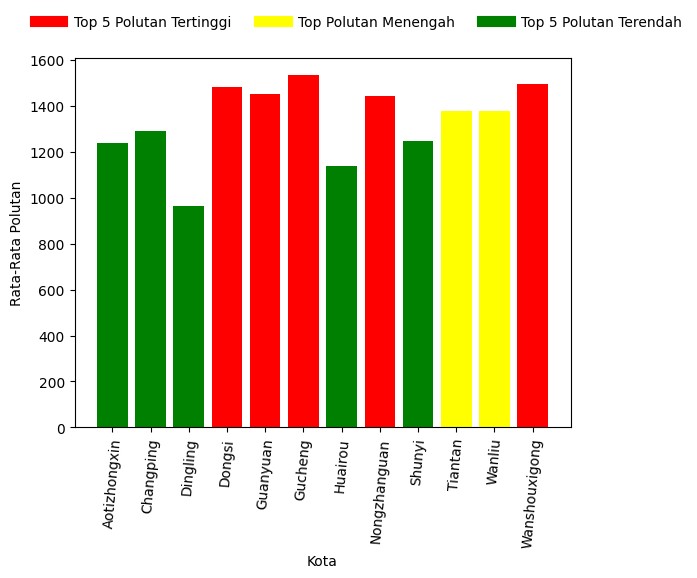

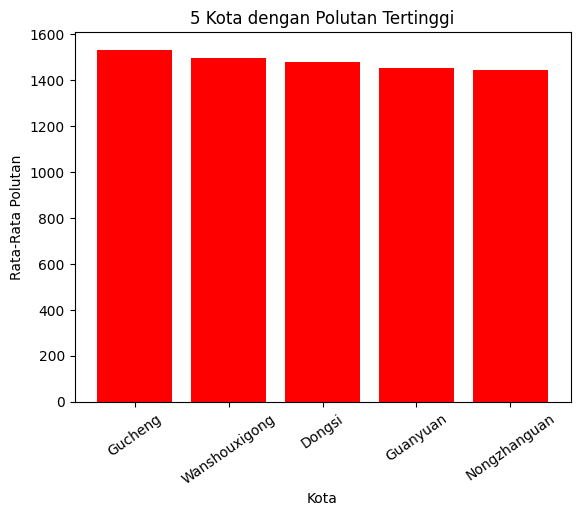

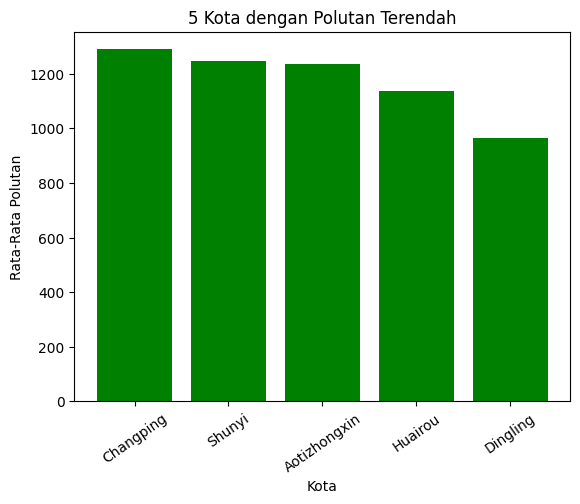

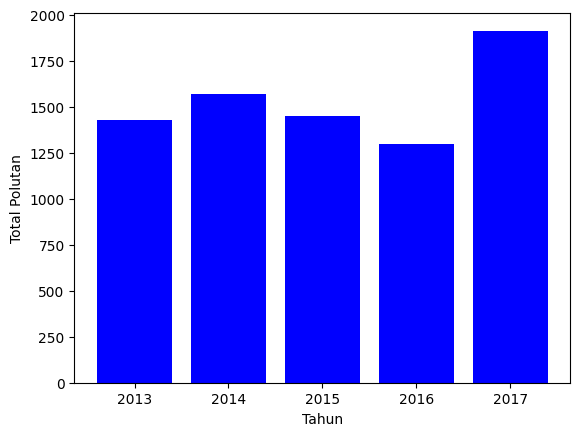

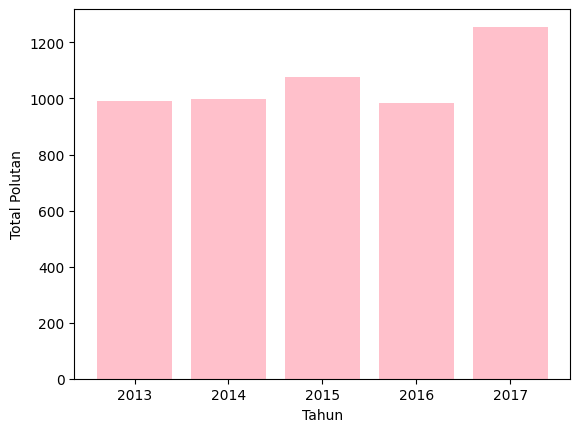

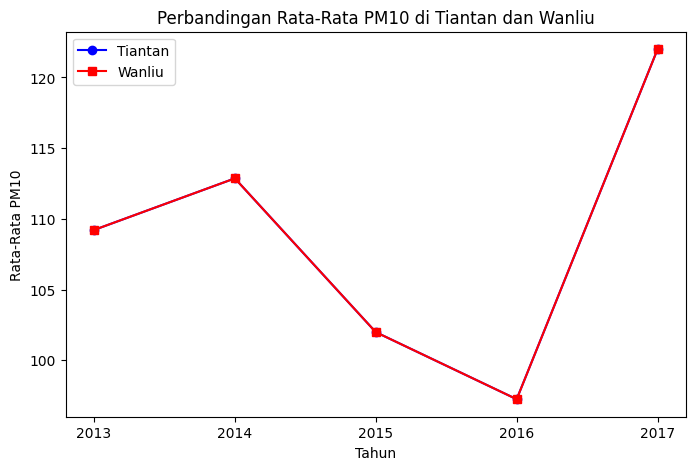

/usr/local/lib/python3.11/dist-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/usr/local/lib/python3.11/dist-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/usr/local/lib/python3.11/dist-packages/matplotlib/patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/usr/local/lib/python3.11/dist-packages/matplotlib/transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


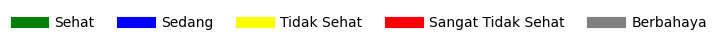

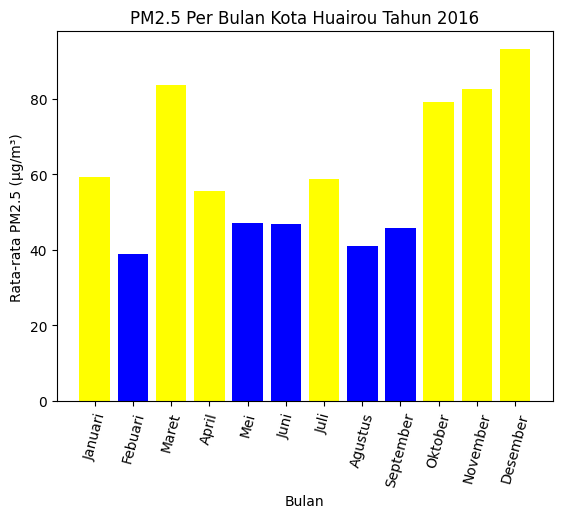

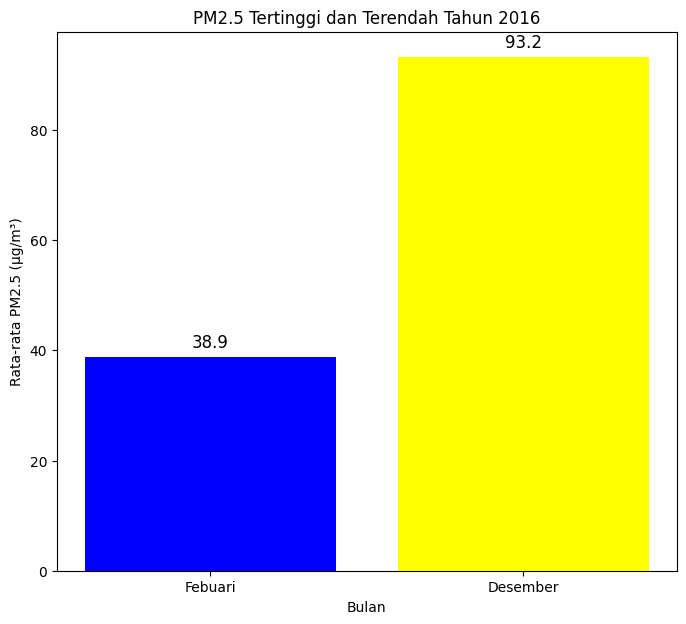

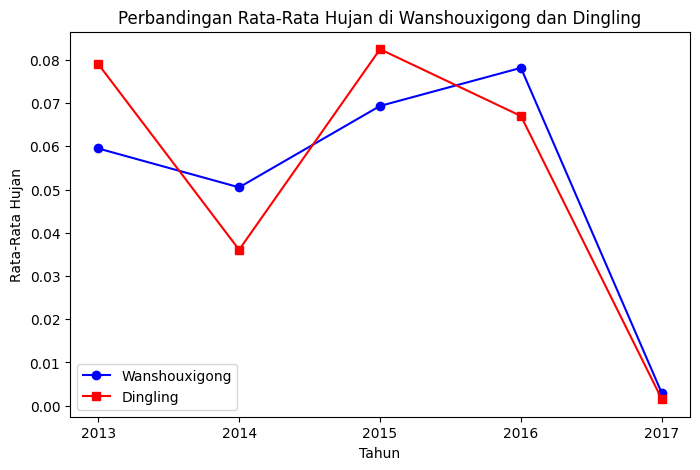

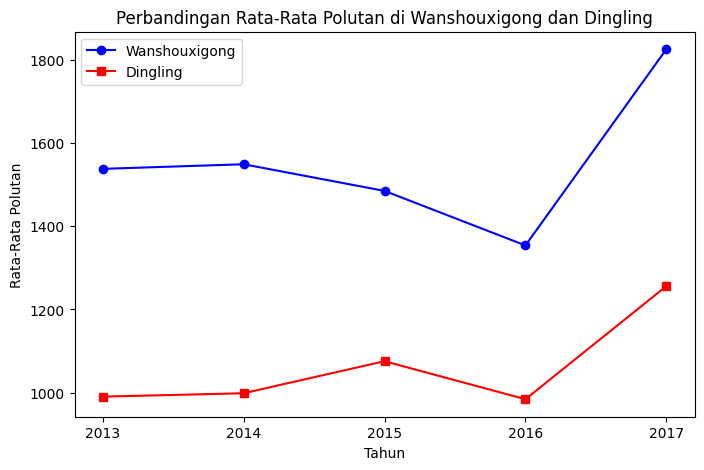

In [24]:
#Tampilan
with st.sidebar :
    selected = option_menu('Menu',['Dashboard','About'],
    icons =["easel2", "info-circle"],
    menu_icon="cast",
    default_index=0)

if (selected == 'Dashboard') :
    st.header(f"Dashboard Analisis Air Quality")
    tab1,tab2,tab3,tab4,tab5,tab6 = st.tabs(["Top 5 Polutan 2014", "Kenaikan Polutan Gucheng", "Perbandingan PM10 kota 2014","Kualitas Udara Huairou 2016","Prediksi PM2.5 Kota Shunyi","Perbandingan Hujan Polutan 2017"])

    with tab1 :
        Top5_Polutan_2014(df_Aotizhongxin,df_Changping, df_Dingling, df_Dongsi, df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan, df_Shunyi, df_Tiantan, df_Wanliu, df_Wanshouxigong)
    with tab2 :
        Kenaikan_Polutan_TinggiRendah_2014 (df_Gucheng, df_Dingling)
    with tab3 :
        Perbandingan_PM10_Tiantan_Wanliu (df_Tiantan,df_Wanliu)
    with tab4 :
        Kualitas_Udara_Huairou_2016(df_Huairou)
    with tab5 :
        Prediksi_PM_Kota_Shunyi (df_Shunyi)
    with tab6 :
        Perbandingan_Hujan_Polutan_2017(df_Wanshouxigong,df_Dingling)

else :
    if (selected == 'About') :
        st.title("Profile Mahasiswa")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10123009")
        st.write("NAMA              : Baihaqi Syawkat")
        st.write("KELAS             : IF-1")
        st.write("BAGIAN PENGERJAAN : Analisis Top5 Polutan 2014")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10123010")
        st.write("NAMA              : Reyhan Tahira")
        st.write("KELAS             : IF-1")
        st.write("BAGIAN PENGERJAAN : Analisis Kenaikan Polutan Gucheng")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10123013")
        st.write("NAMA              : Dhaffa Khairu M.R.T")
        st.write("KELAS             : IF-1")
        st.write("BAGIAN PENGERJAAN : Analisis Polutan Tertinggi Dongsi")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10123019")
        st.write("NAMA              : Cheryl Jessica Oktavia ")
        st.write("KELAS             : IF-1")
        st.write("BAGIAN PENGERJAAN : Analisis Hujan Polutan Tertinggi 2017")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10123025")
        st.write("NAMA              : M Faiq Nurfathurraji")
        st.write("KELAS             : IF-1")
        st.write("BAGIAN PENGERJAAN : Analisis Hujan Polutan Terrendah 2017")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10123040")
        st.write("NAMA              : Rikza Danan Irdian")
        st.write("KELAS             : IF-1")
        st.write("BAGIAN PENGERJAAN : Analisis perbandingan curah hujan terhadap tingkat polutan pada kota yang memiliki polutan ter tinggi dan ter rendah di tahun 2017")

        st.write('<hr>', unsafe_allow_html=True)
        st.caption("UAS Pemrograman Dasar Sains Data")